<a href="https://colab.research.google.com/github/Joaogalescky/Ciencia-de-Dados---2024/blob/main/ANATEL_PBLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluno:** João Vitor Campõe Galescky

**Série:** 2° Ano de Análise e Desenvolvimento de Sistemas

# **Base dados**

**Fonte da base de dados**

ANATEL 2007/2024
[Arquivos (CSV/JSON) - Acessos de banda larga fixa no Brasil](https://basedosdados.org/dataset/4ba41417-ba19-4022-bc24-6837db973009?table=f8fd49ab-cf6e-40dc-9344-d251c22ee4ab)  

**Carregamento da base**  

Para carregar a base em um DataFrame Pandas, execute:
Para acessar o arquivo com a base é necessário solicitar acesso ao Google Drive. No caso desta aula, a base de dados está compartilhada entre todos os alunos incluídos na turma do Google Classroom.

**Google Colaboratory**  

Para execuções utilizando o ambiente do Google Colab, execute o código abaixo. A primeira vez que for executado, será solicitado um código de acesso. Para obter esse código, basta clicar no link gerado e seguir as instruções.
```python
#Solicita acesso ao Google Drive
from google.colab import drive
drive.mount('/drive')

#Carrega a base de dados direto do Google Drive (Executando no Google Colab)
df = pd.read_csv('/drive/MyDrive/Pasta/Pasta/Arquivo.csv', sep=';', encoding='latin1' )
```

### **Bibliotecas importadas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

!pip install geopandas matplotlib

### **Importação do arquivo CSV**

In [ ]:
from google.colab import drive
drive.mount('/drive')

dbPath = '/drive/MyDrive/Banco_de_dados/pble.csv'
df = pd.read_csv(dbPath, encoding='latin1')

Mounted at /drive


### **Importação do arquivo XLSX**

In [ ]:
from google.colab import drive
drive.mount('/drive')

xlsxPath = '/drive/MyDrive/Banco_de_dados/DTB_2022/RELATORIO_DTB_BRASIL_MUNICIPIO.xlsx'
df_xlsx = pd.read_excel(xlsxPath)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### **Análise da base de dados**

Sobre a base de dados referente a ANATEL do ano de 2007/2024, analisar como faixa temporal entre 2008 a 2021, extraindo as seguintes informação utilizando a biblioteca Pandas.

#### 1. Quantas linhas e colunas existem na base?

In [ ]:
print(f'N. Linhas: {len(df)}')
print(f'N. Colunas: {len(df.columns)}')

N. Linhas: 65282
N. Colunas: 10


#### 2. Quais são os tipos de tecnologia fornecidas?

In [ ]:
tec_exist = df['tecnologia'].unique()
print(f'N. Tecnologias: {len(tec_exist)}')
print(f'{tec_exist}')

N. Tecnologias: 9
['ADSL' 'Fibra - FTTx' 'HDSL' 'SATÃ\x89LITE' 'Fibra - Ponto a ponto' 'LP'
 'RÃ\x81DIO' 'DEDICADO' 'Rede Celular']


#### 3. Quantas empresas há na base e quais são seus nomes?

In [ ]:
emp_exist = df['empresa'].unique()
print(f'N. Empresas: {len(emp_exist)}')
emp_nome = df['empresa'].unique()
print(f'Nomes das Empresas: {emp_nome}')

N. Empresas: 5
Nomes das Empresas: ['OI' 'TELEMAR' 'CTBC' 'TELEFÃ\x94NICA' 'SERCOMTEL']


#### 4. Quantas escolas há na base?

In [ ]:
esc = df['id_escola'].unique()
print(f'N. Escolas: {len(esc)}')

N. Escolas: 65272


#### 5. Quantos municípios há na base?

In [ ]:
mp = df['id_municipio'].unique()
print(f'N. Municípios: {len(mp)}')

N. Municípios: 5534


#### 6. Quantos municípios há em cada estado?

In [ ]:
mp_estado = df.groupby('sigla_uf')['id_municipio'].nunique()
mp_estado

,id_municipio
sigla_uf,
AC,22
AL,102
AM,62
AP,16
BA,417
CE,184
DF,1
ES,78
GO,246


#### 7. Contar o número de escolas estaduais, municipais, federais e particulares e mostre quantidade de escola para cada um

In [ ]:
cont_esc = df['rede'].value_counts()
cont_esc

,count
rede,
Municipal,37511
Estadual,27247
Federal,518
Particular,6


#### 8. Quantas escolas a em cada estado?

In [ ]:
df.value_counts('sigla_uf')

,count
sigla_uf,
SP,10478
MG,7135
BA,5534
RJ,4739
PR,4604
RS,3804
MA,2952
SC,2662
PE,2576


#### 9. Qual é a maior conexão por estado no Brasil? apresente a operadora, a UF, a rede e a conexão

In [ ]:
#Agrupa por estado e encontrar a maior conexão
max_conexao_por_estado = df.groupby('sigla_uf')['conexao'].idxmax()

resultado = df.loc[max_conexao_por_estado, ['sigla_uf', 'rede', 'empresa', 'conexao']]
resultado = resultado.rename(columns={'sigla_uf': 'Estado', 'rede': 'Rede', 'empresa': 'Operadora', 'conexao': 'Conexão Máxima'})
resultado

,Estado,Rede,Operadora,Conexão Máxima
148,AC,Estadual,OI,5 Mbps
5204,AL,Municipal,TELEMAR,5 Mbps
235,AM,Municipal,TELEMAR,5 Mbps
22093,AP,Estadual,TELEMAR,5 Mbps
5764,BA,Municipal,TELEMAR,5 Mbps
2118,CE,Municipal,TELEMAR,5 Mbps
20543,DF,Estadual,OI,5 Mbps
10034,ES,Estadual,TELEMAR,5 Mbps
40085,GO,Municipal,CTBC,600 Mbps
951,MA,Municipal,TELEMAR,5 Mbps


#### 10. Quais escolas possuem a maior conexão por estado e que tem como operadora a OI

In [ ]:
esc_oi = df[df['empresa'] == 'OI']
max_conexao_estado = esc_oi.groupby('sigla_uf')['conexao'].idxmax()
esc_oi = esc_oi.loc[max_conexao_estado, ['sigla_uf', 'rede', 'id_escola', 'conexao']]
esc_oi = esc_oi.rename(columns={'sigla_uf': 'Estado', 'rede': 'Rede', 'id_escola': 'ID Escola', 'conexao': 'Conexão Máxima'})
esc_oi

,Estado,Rede,ID Escola,Conexão Máxima
148,AC,Estadual,AC01031974,5 Mbps
20543,DF,Estadual,53009851,5 Mbps
19758,GO,Municipal,52082571,5 Mbps
19038,MS,Estadual,50001094,5 Mbps
19337,MT,Municipal,51060507,5 Mbps
60798,PE,Estadual,52098869,2 Mbps
15131,PR,Municipal,41122852,5 Mbps
0,RO,Municipal,RO01032131,5 Mbps
17563,RS,Municipal,RS01032108,5 Mbps
16754,SC,Municipal,42145503,5 Mbps


#### 11. Quais escolas possuem a maior conexão por estado e que tem como operadora a TELEMAR

In [ ]:
esc_telemar = df[df['empresa'] == 'TELEMAR']
max_conexao_estado = esc_telemar.groupby('sigla_uf')['conexao'].idxmax()
esc_telemar = esc_telemar.loc[max_conexao_estado, ['sigla_uf', 'rede', 'id_escola', 'conexao']]
esc_telemar = esc_telemar.rename(columns={'sigla_uf': 'Estado', 'rede': 'Rede', 'id_escola': 'ID Escola', 'conexao': 'Conexão Máxima'})
esc_telemar

,Estado,Rede,ID Escola,Conexão Máxima
5204,AL,Municipal,27017311,5 Mbps
235,AM,Municipal,13059130,5 Mbps
22093,AP,Estadual,16001567,5 Mbps
5764,BA,Municipal,29150256,5 Mbps
2118,CE,Municipal,23191961,5 Mbps
10034,ES,Estadual,32045344,5 Mbps
951,MA,Municipal,21090203,5 Mbps
7542,MG,Municipal,31096491,5 Mbps
404,PA,Estadual,15035581,5 Mbps
3691,PB,Estadual,25090992,5 Mbps


#### 12. Quais escolas possuem a maior conexão por estado e que tem como operadora a CTBC

In [ ]:
esc_ctbc = df[df['empresa'] == 'CTBC']
max_conexao_estado = esc_ctbc.groupby('sigla_uf')['conexao'].idxmax()
esc_ctbc = esc_ctbc.loc[max_conexao_estado, ['sigla_uf', 'rede', 'id_escola', 'conexao']]
esc_ctbc = esc_ctbc.rename(columns={'sigla_uf': 'Estado', 'rede': 'Rede', 'id_escola': 'ID Escola', 'conexao': 'Conexão Máxima'})
esc_ctbc

,Estado,Rede,ID Escola,Conexão Máxima
40085,GO,Municipal,52059359,600 Mbps
46604,MG,Estadual,31118851,600 Mbps
39142,MS,Municipal,50011464,4 Mbps
34382,SP,Municipal,35246517,600 Mbps


#### 13. Quais escolas possuem a maior conexão por estado e que tem como operadora a TELEFÃ\x94NICA

In [ ]:
esc_telefa = df[df['empresa'] == 'TELEFÃ\x94NICA']
max_conexao_estado = esc_telefa.groupby('sigla_uf')['conexao'].idxmax()
esc_telefa = esc_telefa.loc[max_conexao_estado, ['sigla_uf', 'rede', 'id_escola', 'conexao']]
esc_telefa = esc_telefa.rename(columns = {'sigla_uf': 'Estado', 'rede': 'Rede', 'id_escola': 'ID Escola', 'conexao': 'Conexão Máxima'})
esc_telefa

,Estado,Rede,ID Escola,Conexão Máxima
13135,SP,Estadual,35031082,8 Mbps


#### 14. Quais escolas possuem a maior conexão por estado e que tem como operadora a SERCOMTEL

In [ ]:
esc_sercomtel = df[df['empresa'] == 'SERCOMTEL']
max_conexao_estado = esc_sercomtel.groupby('sigla_uf')['conexao'].idxmax()
esc_sercomtel = esc_sercomtel.loc[max_conexao_estado, ['sigla_uf', 'rede', 'id_escola', 'conexao']]
esc_sercomtel = esc_sercomtel.rename(columns = {'sigla_uf': 'Estado', 'rede': 'Rede', 'id_escola': 'ID Escola', 'conexao': 'Conexão Máxima'})
esc_sercomtel

,Estado,Rede,ID Escola,Conexão Máxima
16057,PR,Estadual,41031806,8 Mbps


#### 15. Qual é quantidade de escolas municipais, estaduais, federais e particulares no estado do Paraná

In [ ]:
df_pr = df[df['sigla_uf'] == 'PR']
cont_esc_pr = df_pr['rede'].value_counts()
cont_esc_pr

,count
rede,
Municipal,2763
Estadual,1816
Federal,25


#### 16. Quais são as maiores conexões de cada munícipio no estado do Paraná? Liste esses munícipios, apresente o ID do munícipio, ID da escola, rede e a conexão

In [ ]:
df_pr = df[df['sigla_uf'] == 'PR']

max_mun = df_pr.groupby('id_municipio')['conexao'].idxmax()

result_pr_filter = df_pr.loc[max_mun, ['id_municipio', 'id_escola', 'rede', 'conexao']]

result_pr_filter = result_pr_filter.rename(columns={'id_municipio': 'ID Município','id_escola': 'ID Escola', 'rede': 'Rede', 'conexao': 'Conexão'})
result_pr_filter

,ID Município,ID Escola,Rede,Conexão
35240,4100103,41042476,Estadual,15.0
35242,4100202,41120353,Estadual,5.0
35245,4100301,41141342,Municipal,15.0
15132,4100400,41122615,Estadual,15.0
15136,4100459,41011139,Estadual,2.0
...,...,...,...,...
16747,4128625,41008936,Estadual,2.0
36770,4128633,41121422,Estadual,5.0
16748,4128658,41107012,Estadual,5.0
16750,4128708,41094590,Municipal,10.0


#### 17. Quais são as conexões de cada munícipio e de todas as suas escolas no estado do Paraná no Brasil? Liste esses munícipios, apresente o ID do munícipio, ID da escola, rede e a conexão

In [ ]:
df_pr = df[df['sigla_uf'] == 'PR']

max_mun = df_pr.groupby('id_escola')['conexao'].idxmax()

result_pr_total = df_pr.loc[max_mun, ['id_municipio', 'id_escola', 'rede', 'conexao']]

result_pr_total = result_pr_total.rename(columns={'id_municipio': 'ID Município','id_escola': 'ID Escola', 'rede': 'Rede', 'conexao': 'Conexão'})
result_pr_total

,ID Município,ID Escola,Rede,Conexão
63352,4117602,17054761,Municipal,10.0
35280,4100608,41000021,Estadual,15.0
35281,4100608,41000064,Municipal,10.0
35284,4100608,41000099,Municipal,2.0
35283,4100608,41000102,Municipal,5.0
...,...,...,...,...
54440,4113205,PR1054626,Municipal,2.0
49079,4117701,PR1054627,Municipal,10.0
49231,4126256,PR1055138,Municipal,5.0
54387,4108304,UAB00042,Municipal,2.0


#### 18. Retorne a quantidade de escolas da rede municipal, de acordo com a questão 16.

In [ ]:
qtd_esc_mun = result_pr_filter[result_pr_filter['Rede'] == 'Municipal'].shape[0]
print(f'Quantidade de escolas municipais com maior conexão de cada município do Paraná: {qtd_esc_mun}')

Quantidade de escolas municipais com maior conexão de cada município do Paraná: 236


#### 19. Retorne a quantidade de escolas da rede estadual, de acordo com a questão 16.

In [ ]:
qtd_esc_est = result_pr_filter[result_pr_filter['Rede'] == 'Estadual'].shape[0]
print(f'Quantidade de escolas estaduais com maior conexão de cada município do Paraná: {qtd_esc_est}')

Quantidade de escolas estaduais com maior conexão de cada município do Paraná: 163


#### 20. Retorne a quantidade de escolas da rede federal, de acordo com a questão 16.

In [ ]:
qtd_esc_est = result_pr_filter[result_pr_filter['Rede'] == 'Federal'].shape[0]
print(f'Quantidade de escolas estaduais com maior conexão de cada município do Paraná: {qtd_esc_est}')

Quantidade de escolas estaduais com maior conexão de cada município do Paraná: 0


#### 21. Retorne a quantidade de escolas da rede particular, de acordo com a questão 16.

In [ ]:
qtd_esc_est = result_pr_filter[result_pr_filter['Rede'] == 'Particular'].shape[0]
print(f'Quantidade de escolas estaduais com maior conexão de cada município do Paraná: {qtd_esc_est}')

Quantidade de escolas estaduais com maior conexão de cada município do Paraná: 0


#### 22. Analisar a qualidade de conexão do estado do Paraná para outros estados do Brasil, em termos de velocidade, calculando a média da velocidade de conexão.

In [ ]:
# Função para converter a conexão para Mbps
def convert_to_mbps(value):
    if isinstance(value, str):
        return float(value.split(' ')[0]) # Extrair a parte numérica antes de 'Mbps'
    return value

df['conexao'] = df['conexao'].apply(convert_to_mbps)

# Calcula a média de conexão para cada estado
md_conexao_estado = df.groupby('sigla_uf')['conexao'].mean().reset_index()

# Filtra a média de conexão do Paraná
media_pr = md_conexao_estado[md_conexao_estado['sigla_uf'] == 'PR']['conexao'].values[0]
print(f'Média de conexão do Paraná: {media_pr:.2f} Mbps')

Média de conexão do Paraná: 6.25 Mbps


## Gráficos

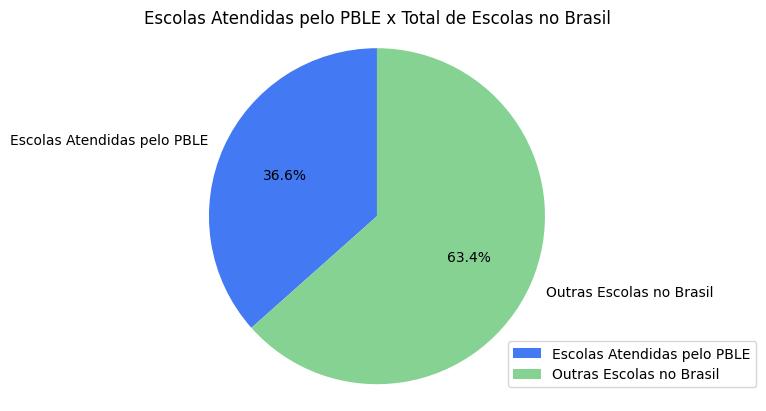

In [ ]:
# @title Total de escolas atendidas pelo PBLE
total_escolas_brasil = 178500
escolas_atendidas_pble = len(df['id_escola'].unique())

# Rótulos
labels = ['Escolas Atendidas pelo PBLE', 'Outras Escolas no Brasil']

# Valores para as fatias
sizes = [escolas_atendidas_pble, total_escolas_brasil - escolas_atendidas_pble]

colors = ['#4379F2', '#86D293']

# Gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Escolas Atendidas pelo PBLE x Total de Escolas no Brasil')

# Legenda
plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.1))

plt.axis('equal')

plt.show()

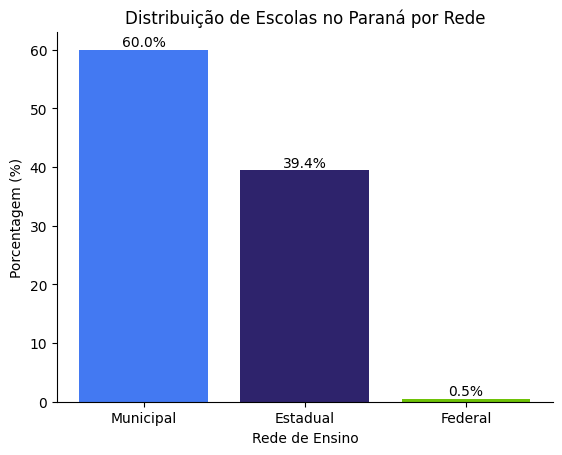

In [ ]:
# @title Distribuição de escolas no Paraná por rede (%)
total_escolas_pr = cont_esc_pr.sum()

porcentagens = cont_esc_pr / total_escolas_pr * 100
cores = ['#4379F2', '#2E236C', '#6EC207']

# Gráfico de barra vertical
plt.bar(cont_esc_pr.index, porcentagens, color=cores)

# Configurações
plt.title('Distribuição de Escolas no Paraná por Rede')
plt.xlabel('Rede de Ensino')
plt.ylabel('Porcentagem (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Valores no topo das barras
for i, v in enumerate(porcentagens):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

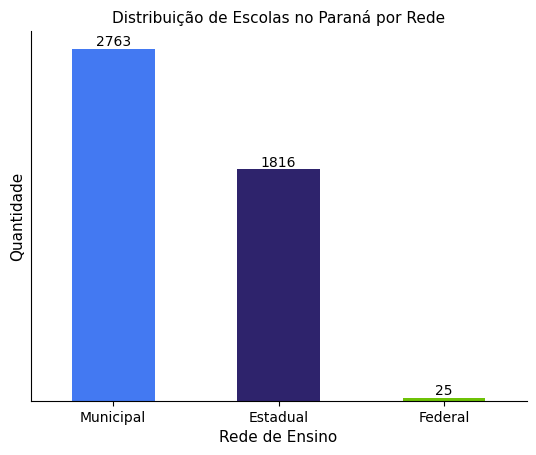

In [ ]:
# @title Distribuição de escolas no Paraná por rede

# Organização de forma decrescente
sorted_data = result_pr_total.groupby('Rede').size().sort_values(ascending=False)

# Gráfico de barras verticais
ax = sorted_data.plot(kind='bar', color=cores)

# Organização
cores = ['#4379F2', '#2E236C', '#6EC207']

plt.title('Distribuição de Escolas no Paraná por Rede', fontsize=11)
plt.xlabel('Rede de Ensino', fontsize=11)
plt.ylabel('Quantidade', fontsize=11)

# Remover bordas
plt.gca().spines[['top', 'right',]].set_visible(False)

# Remover eixo y
ax.yaxis.set_ticks([]) #ou ax.set_yticks([])

# Valores nas barras
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Rotação dos nomes abaixo das barras
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

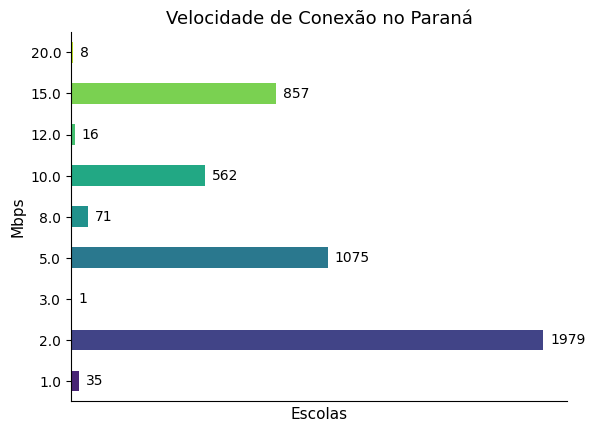

In [ ]:
# @title Nível de Conexão do estado do Paraná.

# Mapeamento
Mbps_map = {
    '1 Mbps': 1,
    '2 Mbps': 2,
    '3 Mbps': 3,
    '5 Mbps': 5,
    '8 Mbps': 8,
    '10 Mbps': 10,
    '12 Mbps': 12,
    '15 Mbps': 15,
    '20 Mbps': 20
}

# Mapeie a coluna 'Conexão' para Mbps
result_pr_total['Mbps'] = result_pr_total['Conexão'].map(Mbps_map)

# Agrupar e contar os dados
conexao = result_pr_total.groupby('Conexão').size()

# Ordenar os dados com base no mapeamento de Mbps
conexao_sorted = conexao.loc[sorted(conexao.index, key=lambda x: Mbps_map.get(x, 0))]

# Gráfico de barra horizontal
ax = conexao_sorted.plot(kind='barh', color=sns.color_palette('viridis', len(conexao_sorted)))

# Remover
plt.gca().spines[['top', 'right']].set_visible(False)

ax.xaxis.set_ticks([]) #ou ax.set_xticks([])

# Adicionar anotações nas barras
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', va='center')

# Adicionar rótulos e título
plt.xlabel('Escolas', fontsize=11)
plt.ylabel('Mbps', fontsize=11)
plt.title('Velocidade de Conexão no Paraná', fontsize=13)

plt.show()

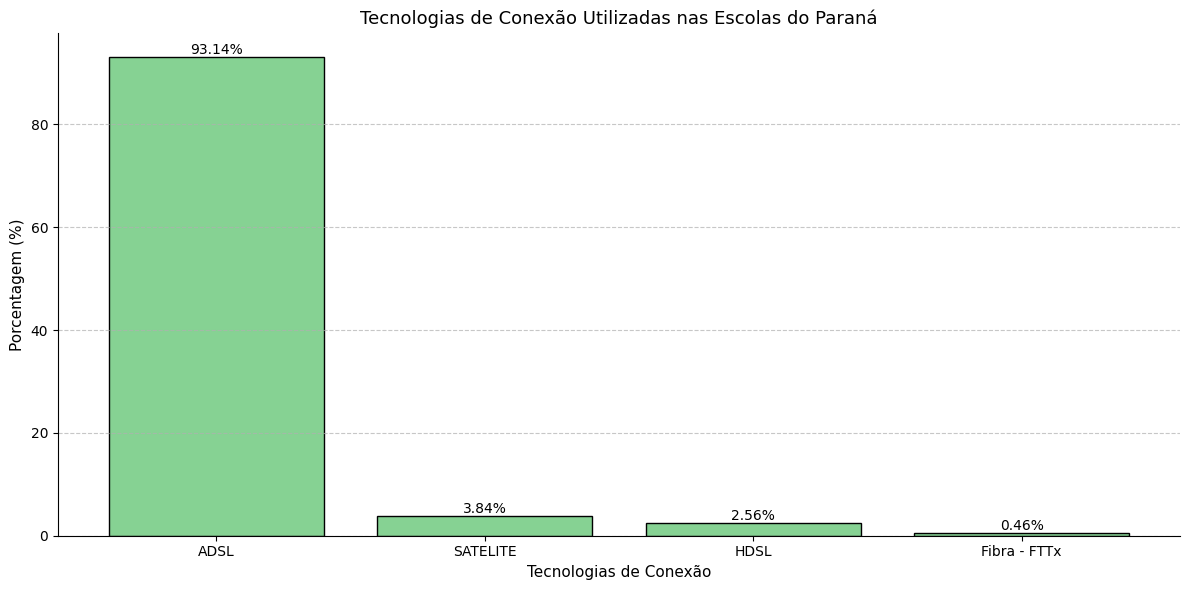

In [ ]:
# @title Tecnologias de conexão utilizadas nas escolas do Paraná
df_pr = df[df['sigla_uf'] == 'PR']

# Correções de nomes
correcoes = {
    'SATÃ\x89LITE': 'SATELITE',
    'RÃ\x81DIO': 'RADIO'
}

df['tecnologia'] = df['tecnologia'].replace(correcoes)

# Calculos
tecnologias_pr = df_pr['tecnologia'].value_counts()
porcentagens = tecnologias_pr / tecnologias_pr.sum() * 100
categorias = tecnologias_pr.index

# Gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho do gráfico
barras = plt.bar(categorias, porcentagens, color='#86D293', edgecolor='black')  # Cor das barras e da borda

# Rótulos e títulos
plt.xlabel('Tecnologias de Conexão', fontsize=11)
plt.ylabel('Porcentagem (%)', fontsize=11)
plt.title('Tecnologias de Conexão Utilizadas nas Escolas do Paraná', fontsize=13)
plt.xticks(rotation=0, ha='center')  # Rotaciona os rótulos do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grade para facilitar a leitura dos valores

# Remover bordas
plt.gca().spines[['top', 'right',]].set_visible(False)

# Valores nas barras
for barra in barras:
  altura = barra.get_height()
  plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Ajusta o layout para que não haja sobreposição
plt.tight_layout()

plt.show()

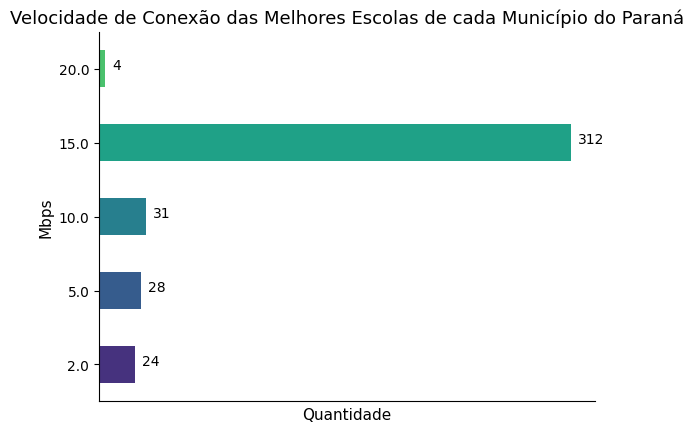

In [ ]:
# @title Nível de Conexão relacionado as melhores escolas de cada município do Paraná.

conexao = result_pr_filter.groupby('Conexão').size()

# Gráfco de barra horizontal
ax = result_pr_filter.groupby('Conexão').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))

# Configuração
plt.xlabel('Quantidade', fontsize=11)
plt.ylabel('Mbps', fontsize=11)
plt.title('Velocidade de Conexão das Melhores Escolas de cada Município do Paraná', fontsize=13)

# Remover
plt.gca().spines[['top', 'right',]].set_visible(False)
ax.xaxis.set_ticks([]) #ou ax.set_xticks([])

# Inserir valores das barras
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 13), textcoords='offset points')

In [ ]:
# @title Municípios extraidos do gráfico de "Nível de Conexão relacionado as melhores escolas de cada município do Paraná".
# Servira para reforçar o gráfico "NÍVEL DE CONEXÃO DAS MELHORES ESCOLAS DE CADA MUNICÍPIO DO PARANÁ" com ID do Municípios filtrado, podendo utilizar outro arquivo.csv para retorna o nome dos municípios

# Extrair os municípios do gráfico
mun_graf = result_pr_filter['ID Município'].unique()

print("Municípios presentes no gráfico:")
for municipio in mun_graf:
  print(municipio)

Municípios presentes no gráfico:
4100103
4100202
4100301
4100400
4100459
4100509
4100608
4100707
4100806
4100905
4101002
4101051
4101101
4101150
4101200
4101309
4101408
4101507
4101606
4101655
4101705
4101804
4101853
4101903
4102000
4102109
4102208
4102307
4102406
4102505
4102604
4102703
4102752
4102802
4102901
4103008
4103024
4103040
4103057
4103107
4103156
4103206
4103222
4103305
4103354
4103370
4103404
4103453
4103479
4103503
4103602
4103701
4103800
4103909
4103958
4104006
4104055
4104105
4104204
4104253
4104303
4104402
4104428
4104451
4104501
4104600
4104659
4104709
4104808
4104907
4105003
4105102
4105201
4105300
4105409
4105508
4105607
4105706
4105805
4105904
4106001
4106100
4106209
4106308
4106407
4106456
4106506
4106555
4106571
4106605
4106704
4106803
4106852
4106902
4107009
4107108
4107124
4107157
4107207
4107256
4107306
4107405
4107504
4107520
4107538
4107546
4107553
4107603
4107652
4107702
4107736
4107751
4107801
4107850
4107900
4108007
4108106
4108205
4108304
4108320
4108403

In [ ]:
# @title Apresentação de municípios de "Nível de Conexão relacionado as melhores escolas de cada município do Paraná".
'''
Por meio do df_xls, apresente o nome de cada município que foi extraído do código de "Municípios extraidos do gráfico de "Nível de Conexão relacionado as melhores escolas de cada município do Paraná" junto ao seu código de identificação.
Organize os nomes  dos municípios e seus ID's extraídos pelo código acima pelo seu nível de conexão conforme o resultado da conexão "Nível de Conexão relacionado as melhores escolas de cada município do Paraná" e apresente-os em texto
'''
# Dicionário com o código do município e o nome do município
mun_xlsx = dict(zip(df_xlsx['Codigo_Municipio'], df_xlsx['Nome_Municipio']))

# Dicionário para armazenar
mun_conexoes = {}

# Iterar sobre o DataFrame result_pr_filter
for index, row in result_pr_filter.iterrows():
  codigo_municipio = row['ID Município']
  conexao = row['Conexão']
  if codigo_municipio in mun_xlsx:
    nome_municipio = mun_xlsx[codigo_municipio]
    if conexao not in mun_conexoes:
      mun_conexoes[conexao] = []
    mun_conexoes[conexao].append(f'{nome_municipio} - {codigo_municipio}')

# Ordenação crescente das conexões
conexoes_ordenadas = sorted(mun_conexoes.keys())

# Saída
print("Municípios organizados por nível de conexão:")
for conexao in conexoes_ordenadas:
  print(f"Conexão: {conexao}")
  for municipio in mun_conexoes[conexao]:
    print(f"  - {municipio}")

Municípios organizados por nível de conexão:
Conexão: 2.0
  - Altamira do Paraná - 4100459
  - Boa Esperança do Iguaçu - 4103024
  - Cafeara - 4103404
  - Conselheiro Mairinck - 4106100
  - Coronel Domingos Soares - 4106456
  - Corumbataí do Sul - 4106555
  - Enéas Marques - 4107405
  - Goioxim - 4108650
  - Honório Serpa - 4109658
  - Inácio Martins - 4110201
  - Itapejara d'Oeste - 4111209
  - Leópolis - 4113403
  - Manoel Ribas - 4114500
  - Nossa Senhora das Graças - 4116406
  - Ortigueira - 4117305
  - Pinhal de São Bento - 4119251
  - Porto Barreiro - 4120150
  - Presidente Castelo Branco - 4120408
  - Sabáudia - 4122701
  - São Jorge d'Oeste - 4125209
  - São Tomé - 4126108
  - Sengés - 4126306
  - Teixeira Soares - 4127007
  - Alto Paraíso - 4128625
Conexão: 5.0
  - Adrianópolis - 4100202
  - Boa Esperança - 4103008
  - Bom Sucesso - 4103206
  - Cidade Gaúcha - 4105607
  - Cruz Machado - 4106803
  - Dois Vizinhos - 4107207
  - Entre Rios do Oeste - 4107538
  - Figueira - 410775

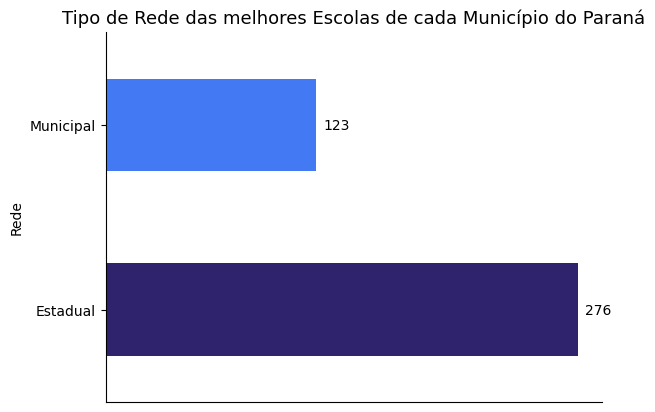

In [ ]:
# @title Tipo de Rede relacionado as melhores escolas de cada município do Paraná.

# Cores
cores = ['#2E236C', '#4379F2']

plt.title('Tipo de Rede das melhores Escolas de cada Município do Paraná', fontsize=13)

# Gráfico de barra horizontal
ax = result_pr_filter.groupby('Rede').size().plot(kind='barh', color=cores)

# Remover linhas
plt.gca().spines[['top', 'right',]].set_visible(False)

# Remover eixo x
ax.xaxis.set_ticks([])

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 30), textcoords='offset points')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


<ipython-input-149-75a6d70c8d1d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr['conexao'] = df_pr['conexao'].apply(convert_to_mbps)


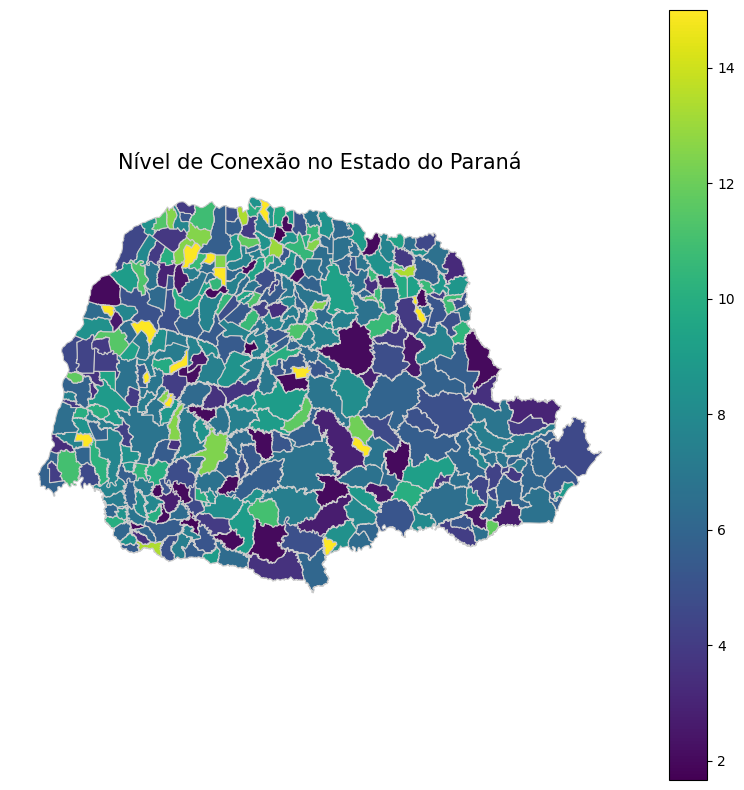

In [ ]:
# @title Mapa do Estado do Paraná - Nível de Conexão

drive.mount('/drive')

dbMapPath = '/drive/MyDrive/Mapas/Municipios_do_Estado_do_Parana_Oficial_2024'
mapa_pr = gpd.read_file(dbMapPath)

# Função para converter a conexão para Mbps
def convert_to_mbps(value):
    if isinstance(value, str):
        return float(value.split(' ')[0]) # Extrair a parte numérica antes de 'Mbps'
    return value

df_pr['conexao'] = df_pr['conexao'].apply(convert_to_mbps)

# Calcule a média de conexão por município no Paraná
media_conexao_municipio = df_pr.groupby('id_municipio')['conexao'].mean().reset_index()

# Converter colunas para o mesmo tipo (string)
mapa_pr['codibge'] = mapa_pr['codibge'].astype(str)
media_conexao_municipio['id_municipio'] = media_conexao_municipio['id_municipio'].astype(str)

# Merge dos dados de conexão com o mapa
mapa_pr = mapa_pr.merge(media_conexao_municipio, left_on='codibge', right_on='id_municipio', how='left')

# Plotar o mapa com as conexões
fig, ax = plt.subplots(1, figsize=(10, 10))
mapa_pr.plot(column='conexao', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Personalizar o mapa
ax.set_title('Nível de Conexão no Estado do Paraná', fontsize=15)
ax.axis('off')

plt.show()

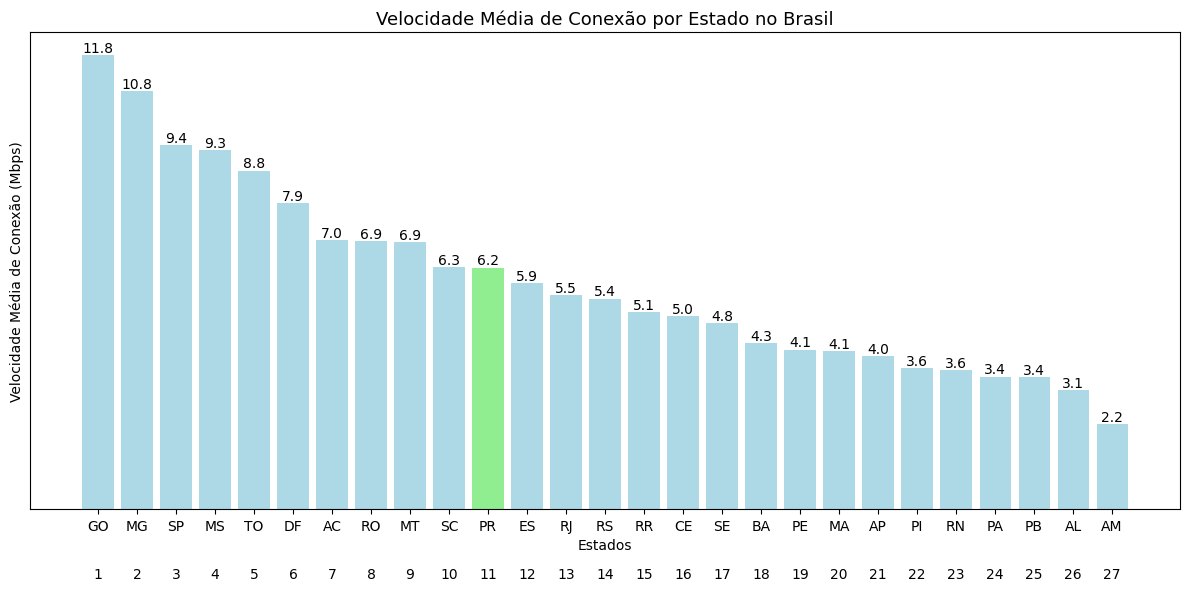

In [ ]:
# @title  Velocidade Média de Conexão por Estado no Brasil

'''
Gere um gráfico de colunas com a operação acima, mostrando a velocidade média de cada estado do Brasil,
pondo em cor destacada, o estado do Paraná para comparações, coloque o valor da média em cima de cada coluna,
e coloque logo abaixo da uf de cada estado o seu número de posição em relação da esquerda para direita (maior para o menor)
'''

# Média de conexão para cada estado
md_conexao_estado = df.groupby('sigla_uf')['conexao'].mean().reset_index()

# Ordena os estados pela média de conexão em ordem decrescente
md_conexao_estado = md_conexao_estado.sort_values('conexao', ascending=False)

# Adiciona a posição de cada estado
md_conexao_estado['posicao'] = range(1, len(md_conexao_estado) + 1)

# Gráfico de barras
plt.figure(figsize=(12, 6))
cores = ['lightblue' if uf != 'PR' else 'lightgreen' for uf in md_conexao_estado['sigla_uf']]
plt.bar(md_conexao_estado['sigla_uf'], md_conexao_estado['conexao'], color=cores)



# Valores da média em cima das barras
for i, valor in enumerate(md_conexao_estado['conexao']):
    plt.text(i, valor, f'{valor:.1f}', ha='center', va='bottom')

# Posição de cada estado abaixo da sigla
for i, posicao in enumerate(md_conexao_estado['posicao']):
    plt.text(i, -1.5, str(posicao), ha='center', va='top')

# Remover eixo x
plt.gca().set_yticks([])

plt.xlabel('Estados')
plt.ylabel('Velocidade Média de Conexão (Mbps)')
plt.title('Velocidade Média de Conexão por Estado no Brasil', fontsize=13)
plt.tight_layout()  # Evitar sobreposição de elementos
plt.show()

**Possíveis implementações:**

1. Relação entre Banda Larga e Desempenho Escolar
Desempenho Educacional vs Conectividade: Verificar se há correlação entre a qualidade da banda larga nas escolas e indicadores de desempenho educacional, como resultados no ENEM, IDEB (Índice de Desenvolvimento da Educação Básica), e taxa de aprovação.
Análise Comparativa: Comparar o desempenho de escolas com banda larga de alta qualidade versus escolas com baixa qualidade ou sem cobertura, identificando possíveis impactos na educação.

2. Identificação de Regiões Críticas
Municípios com Baixa Conectividade: Identificar municípios ou áreas rurais que possuem escolas com pouca ou nenhuma conectividade e propor soluções ou políticas para melhorar essa situação.
Infraestrutura de Telecomunicações: Mapear a infraestrutura de telecomunicações (torres, fibra óptica) e observar se há disponibilidade nas proximidades das escolas, mas que não foi aproveitada.

3. Evolução Temporal da Conectividade
Análise Histórica: Verificar a evolução da conectividade nas escolas do Paraná ao longo dos anos. Você pode usar dados históricos da ANATEL e do PBLE para entender como a infraestrutura de internet nas escolas tem melhorado (ou não).

Dados Necessários:
* Dados da ANATEL: cobertura de banda larga, número de assinantes, tecnologia de conexão (fibra óptica, rádio, satélite), e velocidades médias disponíveis por município.
* Dados do PBLE: escolas conectadas, a qualidade da conexão, e os provedores de serviço.
* Dados Educacionais (INEP/IDEB): desempenho escolar, como notas no ENEM e IDEB.
* Dados Socioeconômicos (IBGE): contextualizar as regiões com base na renda, densidade populacional, etc.

Ferramentas a mais:
* Pandas e Scikit-Learn: análise estatística e correlações entre conectividade e desempenho escolar.
* Folium: visualizações interativas de mapas, permitindo uma exploração mais detalhada da infraestrutura.